*Welcome!*

## **Sales Strategy Analysis for SuperStore**

For this analysis project, the objective is to develop useful insights that will assist sales department of the superstore in making core business initiatives in order to perfect their sales strategy approach.
Our goal is to answer these following questions

*   What was the best month for sales? How much was earned that month?
*   Which city had the highest number of sales?
*   Recommend the most appropriate time to display advertising to maximize the likelihood of customers buying the products?
*   What products sold the most? Why do you think it sold the most?

> Let's Begin!

**Importing Libaries**

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

**Getting Data**

> Data Source - K-Mart (a major online store in the United States)

Loading data for each month

In [52]:
M1 = pd.read_csv("/content/Sales_January_2019.csv")
M2 = pd.read_csv("/content/Sales_February_2019.csv")
M3 = pd.read_csv("/content/Sales_March_2019.csv")
M4 = pd.read_csv("/content/Sales_April_2019.csv")
M5 = pd.read_csv("/content/Sales_May_2019.csv")
M6 = pd.read_csv("/content/Sales_June_2019.csv")
M7 = pd.read_csv("/content/Sales_July_2019.csv")
M8 = pd.read_csv("/content/Sales_August_2019.csv")
M9 = pd.read_csv("/content/Sales_September_2019.csv")
M10 = pd.read_csv("/content/Sales_October_2019.csv")
M11 = pd.read_csv("/content/Sales_November_2019.csv")
M12 = pd.read_csv("/content/Sales_December_2019.csv")

Let's take a quick look of one the loaded data

In [53]:
M1.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
5,141239,AAA Batteries (4-pack),1,2.99,01/29/19 20:22,"775 Willow St, San Francisco, CA 94016"
6,141240,27in 4K Gaming Monitor,1,389.99,01/26/19 12:16,"979 Park St, Los Angeles, CA 90001"
7,141241,USB-C Charging Cable,1,11.95,01/05/19 12:04,"181 6th St, San Francisco, CA 94016"
8,141242,Bose SoundSport Headphones,1,99.99,01/01/19 10:30,"867 Willow St, Los Angeles, CA 90001"
9,141243,Apple Airpods Headphones,1,150,01/22/19 21:20,"657 Johnson St, San Francisco, CA 94016"


## Combine All Data

Since we have numerous datasets, we need to combine each of this data into a single dataframe and label each by their respective month 

In [54]:
#Create a new category named "Month" for each dataset per month
M1["Month"]="Jan"
M2["Month"]="Feb"
M3["Month"]="Mar"
M4["Month"]="Apr"
M5["Month"]="May"
M6["Month"]="Jun"
M7["Month"]="Jul"
M8["Month"]="Aug"
M9["Month"]="Sep"
M10["Month"]="Oct"
M11["Month"]="Nov"
M12["Month"]="Dec"

In [55]:
Month_list=[M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12]
All_data = pd.concat(Month_list)

Now Lets' take look of our combined data

In [56]:
All_data.head(5)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",Jan
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",Jan
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",Jan
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",Jan
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",Jan


In [57]:
All_data.tail(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",Dec
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",Dec
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",Dec
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",Dec
25116,319670,Bose SoundSport Headphones,1,99.99,12/21/19 21:45,"747 Chestnut St, Los Angeles, CA 90001",Dec


In [58]:
All_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 25116
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
 6   Month             186850 non-null  object
dtypes: object(7)
memory usage: 11.4+ MB


In [59]:
All_data.shape

(186850, 7)

## **Data Cleansing**

> Removing Null Values

In [60]:
All_data.isnull().sum() 

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
Month                 0
dtype: int64

The output above shows that there are 545 null values in each column with the exception of month column

In [61]:
Null_percentage = (All_data.isnull().sum().sum())/len(All_data)*100
Null_percentage

1.75006689858175

We can observe that 1.75 percent null values are present in the data set, hence, we'll drop them

In [62]:
All_data = All_data.dropna()

Droping Duplicate Values

In [63]:
All_data[All_data['Product'] == "Product"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Jan
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Jan
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Jan
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Jan
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Jan
...,...,...,...,...,...,...,...
23198,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Dec
23337,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Dec
23748,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Dec
24192,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Dec


There are 355 columns in which the values in the rows are the same as the header. As a result, a new datframe will be created that excludes these variables.

In [64]:
Formatted_data = All_data[All_data['Product'] != "Product"] 
Formatted_data.head(7) 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",Jan
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",Jan
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",Jan
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",Jan
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",Jan
5,141239,AAA Batteries (4-pack),1,2.99,01/29/19 20:22,"775 Willow St, San Francisco, CA 94016",Jan
6,141240,27in 4K Gaming Monitor,1,389.99,01/26/19 12:16,"979 Park St, Los Angeles, CA 90001",Jan


In [65]:
Formatted_data.shape

(185950, 7)

In [66]:
Formatted_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 25116
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  object
dtypes: object(7)
memory usage: 11.3+ MB


Convert each data columns to appropriate data types

In [67]:
Formatted_data["Quantity Ordered"] = Formatted_data["Quantity Ordered"].astype("float")
Formatted_data["Price Each"] = Formatted_data["Price Each"].astype("float")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [68]:
Formatted_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 25116
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  float64
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  object 
dtypes: float64(2), object(5)
memory usage: 11.3+ MB


To answer our first business question
> ### What was the best month for sales? 

>### How much was earned that month?

First, let's get the value of all sales by multiplying Each Price with Quantity Ordered

In [69]:
Formatted_data["sales"]=Formatted_data["Quantity Ordered"]*Formatted_data["Price Each"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
Formatted_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,141234,iPhone,1.0,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",Jan,700.00
1,141235,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",Jan,14.95
2,141236,Wired Headphones,2.0,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",Jan,23.98
3,141237,27in FHD Monitor,1.0,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",Jan,149.99
4,141238,Wired Headphones,1.0,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",Jan,11.99


In [71]:
Formatted_data["Month"].nunique()

12

In [72]:
Sales_Sum = Formatted_data.groupby(['Month'])['sales'].sum().sort_values(ascending=False)
Sales_Sum=Sales_Sum.to_frame()

In [73]:
Sales_Sum.head(13)

,sales
Month,
Dec,4.619297e+06
Oct,3.736884e+06
Apr,3.396059e+06
Nov,3.198909e+06
May,3.144585e+06
Mar,2.809063e+06
Jul,2.646900e+06
Jun,2.578293e+06
Aug,2.244412e+06


In [74]:
month=["dec","oct","apr","nov","may","mar","july","june","aug",'feb',"sep","jan"] 
Sales_Sum["month"]=month
Sales_Sum.head(13)

,sales,month
Month,,
Dec,4.619297e+06,dec
Oct,3.736884e+06,oct
Apr,3.396059e+06,apr
Nov,3.198909e+06,nov
May,3.144585e+06,may
Mar,2.809063e+06,mar
Jul,2.646900e+06,july
Jun,2.578293e+06,june
Aug,2.244412e+06,aug


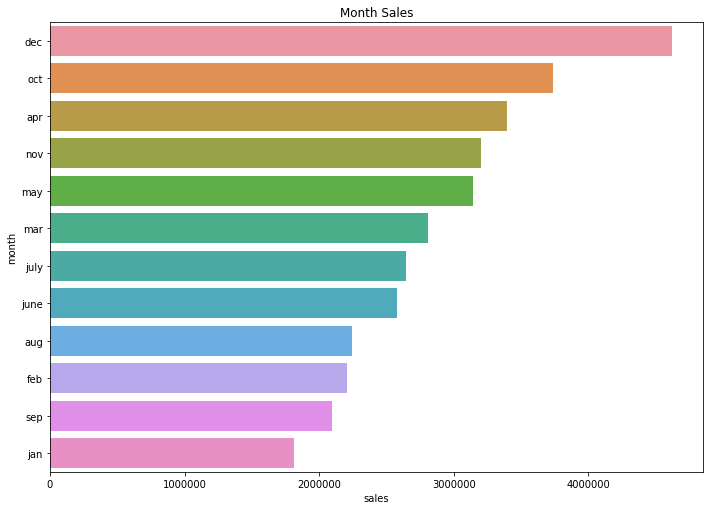

In [75]:
from matplotlib import pyplot as plt
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
plt.ticklabel_format(style='plain')
sns.barplot(x = "sales",
            y = "month",
            data = Sales_Sum)
plt.title("Month Sales")
plt.show()

From the visualization plot, it can be confirmed that the best Month for sales was **DECEMBER** with a total sales in December is **$4619297**

For our second business question, Which city had the highest number of sales?

In [76]:
Improvised_data = Formatted_data
All_city = []
for i in Improvised_data['Purchase Address']:
    All_city.append(i.split(",")[1])
Improvised_data['City'] = All_city
Improvised_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City
0,141234,iPhone,1.0,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",Jan,700.00,Boston
1,141235,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",Jan,14.95,Portland
2,141236,Wired Headphones,2.0,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",Jan,23.98,San Francisco
3,141237,27in FHD Monitor,1.0,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",Jan,149.99,Los Angeles
4,141238,Wired Headphones,1.0,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",Jan,11.99,Austin


In [77]:
All_city = Improvised_data.groupby(["City"])['sales'].sum().sort_values(ascending=False)
All_city = All_city.to_frame()

In [78]:
Improvised_data["City"].nunique()

9

In [79]:
city = ["San Francisco","Los Angeles","New York City","Boston","Atlanta","Dallas","Seattle","Portland","Austin"]

In [80]:
All_city["city"] = city

In [81]:
All_city

,sales,city
City,,
San Francisco,8.262204e+06,San Francisco
Los Angeles,5.452571e+06,Los Angeles
New York City,4.664317e+06,New York City
Boston,3.661642e+06,Boston
Atlanta,2.795499e+06,Atlanta
Dallas,2.767975e+06,Dallas
Seattle,2.747755e+06,Seattle
Portland,2.320491e+06,Portland
Austin,1.819582e+06,Austin


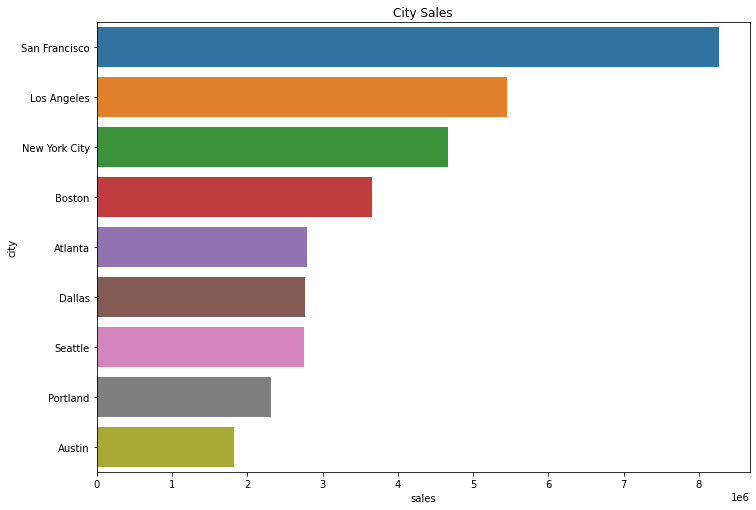

In [82]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x = "sales",
            y = "city",
            data = All_city)
plt.title("City Sales")
plt.show()

It can be observed that **San Francisco** has most sales **$8262204** 

## What products sold the most ?

In [83]:
Products = Formatted_data.groupby(['Product'])['Quantity Ordered'].sum().sort_values(ascending=False).head()
Products = Products.to_frame()

In [84]:
Product_List=["AAA Batteries (4-pack)","AA Batteries (4-pack)","USB-C Charging Cable","Lightning Charging Cable","Wired Headphones"]

In [85]:
Products["Product"] = Product_List

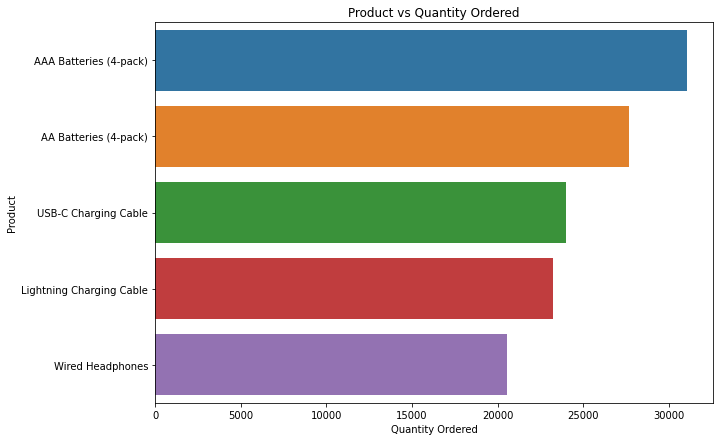

In [86]:
a4_dims = (10, 7)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x = "Quantity Ordered",
            y = "Product",
            data = Products)
plt.title("Product vs Quantity Ordered")
plt.show()

The most sold product is AAA Batteries (4-pack) with 31017 quantity of  is sold in a year. It is most sold because it is the cheapest product compared to others

## Recommend the most appropriate time to display advertising to maximize the likelihood of customers buying the products?

In [87]:
Times = Formatted_data
Time_List = []
for i in Times['Order Date']:
    Time_List.append(i.split(" ")[1])
Times['Time'] = Time_List
Times.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City,Time
0,141234,iPhone,1.0,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",Jan,700.00,Boston,21:25
1,141235,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",Jan,14.95,Portland,14:15
2,141236,Wired Headphones,2.0,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",Jan,23.98,San Francisco,13:33
3,141237,27in FHD Monitor,1.0,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",Jan,149.99,Los Angeles,20:33
4,141238,Wired Headphones,1.0,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",Jan,11.99,Austin,11:59


In [88]:
Time_Group = Formatted_data.groupby(['Time'])['sales'].sum().sort_values(ascending=False).head()
Time_Group = Time_Group.to_frame()
Time_Group

,sales
Time,
19:01,54503.14
12:21,54181.96
19:16,54156.39
20:13,53149.51
19:20,52903.41


Total sales peaked at these respective times 

In [89]:
#End